# Metodo de Monte Carlo acierto y error

En este caso se utilizará el método de Monte Carlo para estimar integrales definidas.

**PASO 1**. Genere una secuencia $\{U_j\}_{j=1}^{2N}$ de $2N$ números aleatorios.

In [8]:
from random import random

"""
  Esta funcion genera un par de numeros aleatorios con distribucion uniforme
  con a=0 y b=1
"""
def uniforme():
  return (random(),random())

# Pequeña prueba del codigo

for i in range(10):
  print(uniforme())


(0.198298950512259, 0.5619358567652047)
(0.23987200188072078, 0.4652823351374399)
(0.6511036181298631, 0.8833053890956982)
(0.470350828942078, 0.21151767910598873)
(0.2761974989795515, 0.27591154202696044)
(0.6465810762376483, 0.23685605733971438)
(0.596308752365549, 0.8427854471825202)
(0.9728658385424254, 0.2710089050440653)
(0.10855766666672606, 0.6498654774026241)
(0.870087197870722, 0.8417263279121663)


**PASO 2**. Organice los números aleatorios en $N$ pares $(U_1,U_1^´),(U_2,U_2^´),...,(U_N,U_N^´)$ de cualquier forma tal que cada número aleatorio $U_j$ se use exactamente una vez.

In [9]:
N = 5 #por ejemplo

def lista(n):
  l = []
  for n in range(n):
    l.append(uniforme())
  return l

print(lista(N))

[(0.03229396177370758, 0.6159661864984769), (0.07502807883035334, 0.15966375888028594), (0.4764136163302014, 0.8904559087302765), (0.8202304655965117, 0.2652627256884761), (0.3612071457517312, 0.9620985495682173)]


**PASO 3**. Calcule $X_i=a+U_i(b-a)\hspace{0.5cm}$ y $\hspace{0.5cm}g(X_i) , \hspace{0.5cm}i=1,2,...,N$

In [24]:
X = lambda a,b,u: a+u[0]*(b-a)

a = 0
b = 1

v = lista(N)

# pequeña prueba del codigo
for j in v:
  print(X(a,b,j))


0.9285375263732516
0.6608202799356101
0.3614115371324276
0.6992328547232693
0.05884265549904211


A modo de ejemplo se va a utilizar la función $g(x)=-x^2+x$

In [26]:
import numpy as np

g = np.poly1d([-1,1,0])

for j in lista(N):
  print(X(a,b,j),g(X(a,b,j)))


0.1409062197351051 0.12105165697506737
0.5859771894029313 0.24260792290237249
0.3967840936692264 0.23934647668031697
0.9645485401059317 0.03419465388544755
0.5303593346203724 0.24907831080140824


Grafica de la función

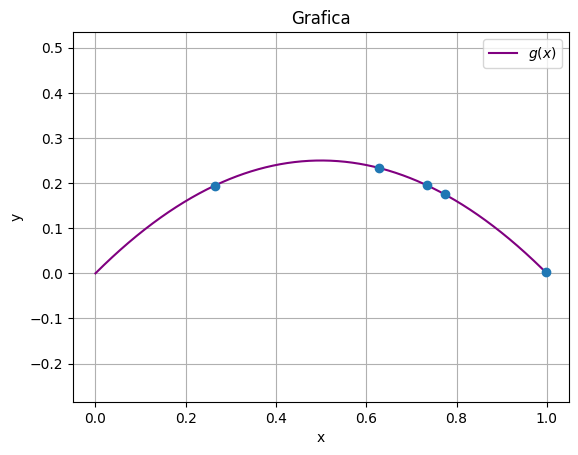

In [12]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x = []
for i in lista(N):
  x.append(i[0])

y = list(map(g ,x))

x1 = np.arange(a,b,0.001)

plt.title('Grafica')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x1,g(x1),color="purple",label="$g(x)$")
plt.plot(x,y,"o")
plt.legend(loc='upper right')
plt.axis('equal')
plt.grid()
plt.show()

**PASO 4**. Cuente el número de casos $N_H$ para los cuales $g(X_i)>cU_i^{'}$

In [60]:
c = 1

def NH(a,b,c,f,l):
  n = 0
  for i in l:
    if f(X(a,b,i))>c*i[1]:
      n+=1
  return n

print(NH(a,b,c,g,lista(100)))

16


**PASO 5**. Estime la integral $I$ por $\theta_1=c(b-a)\dfrac{N_H}{N}$

In [70]:
def I(a,b,c,n,f):
  n2=0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      n2+=1
  return c*(b-a)*(n2/n)

print(I(0,1,0.5,1000,g))

0.158


Use el método de Acierto y Error para estimar las integrales:

$(a) \int_{0}^{1}e^{e^x}dx$

$(b) \int_0^1\sqrt{(1-x^2)^3}dx$

## Solución

$$(a) \int_{0}^{1}e^{e^x}dx$$

**Paso 1.** Intervalo de integracion.

El intervalo de integración va de $0\leqslant x \leqslant 1$ por lo tanto $a=0,b=1$ y se propone una cota de $c=100$ y $N=500000$ corremos el codigo para ver el resultado que arroja.

In [92]:
from math import exp

def I(a,b,c,n,f):
  s = 0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      s+=1
  return c*(b-a)*(s/n)

g1 = lambda x: exp(exp(x)) # funcion del inciso (a)

print("I = {0}".format(I(0,1,100,500000,g1)))

I = 6.3154


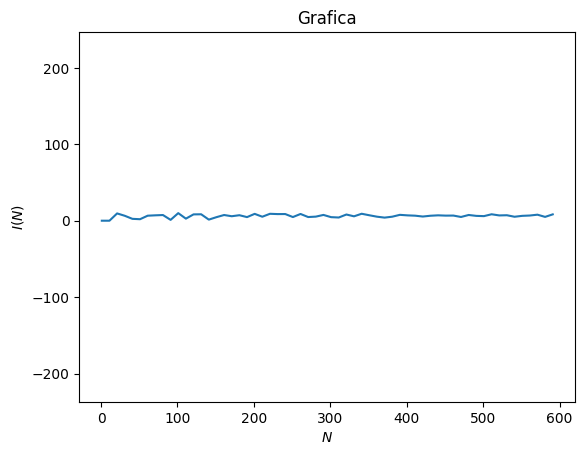

In [98]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()

N1 = np.arange(1,600,10) # con saltos de 10 en 10
y = []
for i in range(len(N1)):
  y.append(I(0,1,100,N1[i],g1))

plt.title('Grafica')
plt.xlabel('$N$')
plt.ylabel('$I(N)$')
plt.plot(N1,y)
plt.axis('equal')
plt.show()

Para la segunda integral se tiene el siguinete resultado si $a=0,b=1,c=100$ y $N=500000$

In [99]:
from math import sqrt

def I(a,b,c,n,f):
  s = 0
  for i in lista(n):
    if f(X(a,b,i))>c*i[1]:
      s+=1
  return c*(b-a)*(s/n)

g2 = lambda x: sqrt((1-x**2)**3) # funcion del inciso (b)

print("I = {0}".format(I(0,1,100,500000,g2)))

I = 0.5928
